In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import interpolate

In [2]:
class Vehicle:
    def __init__(self, ):
        self.pos=[] # x, y [m]
        self.size=[] # length, width [m]
        self.ori=[] # [rad]
        self.vel=[] # [m/s]

In [3]:
def vehicle_plot(pos, size, ori):
    if 0:
        points = [
            [pos[0] - size[0]/2, pos[0] + size[0]/2, pos[0] + size[0]/2, pos[0] - size[0]/2, pos[0] - size[0]/2],
            [pos[1] - size[1]/2, pos[1] - size[1]/2, pos[1] + size[1]/2, pos[1] + size[1]/2, pos[1] - size[1]/2]
        ]
    else:
        points = [[],[]]
        x = [- size[0]/2, size[0]/2, size[0]/2, - size[0]/2, - size[0]/2]
        y = [- size[1]/2, - size[1]/2, size[1]/2, size[1]/2, - size[1]/2]
        A = [[np.cos(ori), -np.sin(ori)],[np.sin(ori), np.cos(ori)]]
        for i in range(len(x)):
            buf = np.dot(A,np.array([x[i],y[i]]))
            points[0].append(buf[0] + pos[0])
            points[1].append(buf[1] + pos[1])
    plt.plot(points[0], points[1])

In [ ]:
#interpld
def spline1(x,y,point):
    f = interpolate.interp1d(x, y,kind="cubic") #kindの値は一次ならslinear、二次ならquadraticといった感じに
    X = np.linspace(x[0],x[-1],num=point,endpoint=True)
    Y = f(X)
    return X,Y

#Akima1DInterpolator
def spline2(x,y,point):
    f = interpolate.Akima1DInterpolator(x, y)
    X = np.linspace(x[0],x[-1],num=point,endpoint=True)
    Y = f(X)
    return X,Y

#splprep
def spline3(x,y,point,deg):
    tck,u = interpolate.splprep([x,y],k=deg,s=0) 
    u = np.linspace(0,1,num=point,endpoint=True) 
    spline = interpolate.splev(u,tck)
    return spline[0],spline[1]

In [4]:
parked_vehicle = Vehicle()
parked_vehicle.pos = [20, 1.5]
parked_vehicle.size = [4, 2]
parked_vehicle.ori = 0
parked_vehicle.ori = 0

ego_vehicle = Vehicle()
ego_vehicle.pos = [0,0]
ego_vehicle.size = [4,2]
ego_vehicle.ori = 0
ego_vehicle.vel = 10/3.6

line_left = [[0,40],[2, 2]]
line_center = [[0,40], [0,0]]
line_right = [[0,40],[-2, -2]]

In [5]:
margin_x = 2.5
margin_y = 2.5

pattern = 4

if pattern == 0:
    points = [
        [ego_vehicle.pos[0],  line_center[0][1]], 
        [ego_vehicle.pos[1], line_center[1][1]]
    ]
elif pattern == 1:
    points = [
        [ego_vehicle.pos[0], parked_vehicle.pos[0] - margin_x, line_center[0][1]], 
        [ego_vehicle.pos[1], parked_vehicle.pos[1] - margin_y, line_center[1][1]]
    ]
elif pattern == 2:
    points = [
        [ego_vehicle.pos[0], parked_vehicle.pos[0] - 2*margin_x, parked_vehicle.pos[0] - margin_x, line_center[0][1]], 
        [ego_vehicle.pos[1], parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, line_center[1][1]]
    ]
elif pattern == 3:
    points = [
        [ego_vehicle.pos[0], parked_vehicle.pos[0] - 2*margin_x, parked_vehicle.pos[0] - margin_x, parked_vehicle.pos[0] + margin_x, line_center[0][1]], 
        [ego_vehicle.pos[1], parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, line_center[1][1]]
    ]
elif pattern == 4:
    points = [
        [ego_vehicle.pos[0], parked_vehicle.pos[0] - 2*margin_x, parked_vehicle.pos[0] - margin_x, parked_vehicle.pos[0] + margin_x, parked_vehicle.pos[0] + 2*margin_x, line_center[0][1]], 
        [ego_vehicle.pos[1], parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, line_center[1][1]]
    ]
elif pattern == 5:
    points = [
        [ego_vehicle.pos[0], 10, parked_vehicle.pos[0] - 2*margin_x, parked_vehicle.pos[0] - margin_x, parked_vehicle.pos[0] + margin_x, parked_vehicle.pos[0] + 2*margin_x, line_center[0][1]], 
        [ego_vehicle.pos[1], ego_vehicle.pos[1], parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, parked_vehicle.pos[1] - margin_y, line_center[1][1]]
    ]


path_coef = np.polyfit(points[0], points[1], 6)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RankWarning: Polyfit may be poorly conditioned


In [6]:
path_x= np.linspace(ego_vehicle.pos[0], line_left[0][1], 20)
path_y = np.poly1d(path_coef)(path_x)

Text(0, 0.5, 'Y[m]')

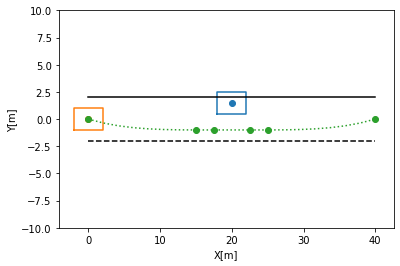

In [7]:
plt.scatter(parked_vehicle.pos[0], parked_vehicle.pos[1])
vehicle_plot(parked_vehicle.pos, parked_vehicle.size, parked_vehicle.ori)
plt.scatter(ego_vehicle.pos[0], ego_vehicle.pos[1])
vehicle_plot(ego_vehicle.pos, ego_vehicle.size, ego_vehicle.ori)

plt.plot(line_left[0], line_left[1], 'k')
plt.plot(line_right[0], line_right[1], '--k')

plt.scatter(points[0],points[1])
plt.plot(path_x, path_y,':')

plt.ylim([-10,10])
plt.xlabel('X[m]')
plt.ylabel('Y[m]')

In [8]:
def global_to_sl(x, y, ori, path_x, path_y):
    a = np.tan(ori)
    b = y - a*x
    x_s = path_x - (a + b - path_y)*a
    y_s = a*x_s + b
    s = np.sqrt(x_s*x_s + y_s*y_s)
    l = (a*path_x - path_y + b) / np.sqrt(a*a + 1)
    return s, l

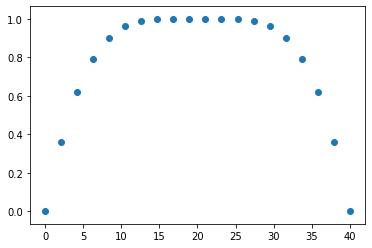

In [9]:
s, l = global_to_sl(ego_vehicle.pos[0], ego_vehicle.pos[1], ego_vehicle.ori, path_x, path_y)
plt.scatter(s, l)

In [10]:
def calculate_lateral_error(x, y, ori, d_preview,path_x, path_y):
    x_pp = x + d_preview * np.cos(ori)
    y_pp = y + d_preview * np.sin(ori)

    if (np.tan(ori) < 0.01):
        a = 1e10
    else:
        a = 1/np.tan(ori)
        
    b = 1
    c = -(a*x_pp+y_pp)
    d = np.abs(a*path_x + b*path_y + c) / np.sqrt(a*a + b*b)
    ind = np.argmin(d)
    
    if 0:
        plt.scatter(x, y);
        plt.scatter(path_x, path_y)
        plt.scatter(x_pp, y_pp);
        plt.plot([x,x_pp],[y,y_pp],'k:')
        plt.scatter(path_x[ind],path_y[ind])
        plt.plot([x_pp,path_x[ind]],[y_pp,path_y[ind]],'k--')
        plt.xlabel('X[m]')
        plt.ylabel('Y[m]')
        
    aa = -np.tan(ori)
    bb = 1
    cc = -(aa*x_pp + b*y_pp)
    lat_error = (aa*path_x[ind] + bb*path_y[ind] + cc) / np.sqrt(aa*aa + bb*bb)
    
    return lat_error

In [11]:
calculate_lateral_error(ego_vehicle.pos[0], ego_vehicle.pos[1], ego_vehicle.ori, 2, path_x, path_y)

-0.3618988633382875

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


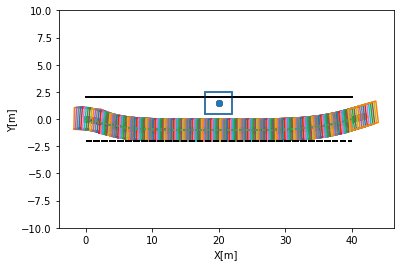

In [12]:
dt = 0.1
time_start = 0
time_end = 15
time = np.linspace(time_start, time_end, time_end/dt + 1)

path_ego_x = []
path_ego_y = []
yawrate = []

fig = plt.figure()
ims = []

for i in time:
    gamma = calculate_lateral_error(ego_vehicle.pos[0], ego_vehicle.pos[1], ego_vehicle.ori, 2, path_x, path_y)
    ego_vehicle.ori = ego_vehicle.ori + gamma * dt
    ego_vehicle.pos[0] = ego_vehicle.pos[0] + np.cos(ego_vehicle.ori) * ego_vehicle.vel * dt
    ego_vehicle.pos[1] = ego_vehicle.pos[1] + np.sin(ego_vehicle.ori) * ego_vehicle.vel * dt
    path_ego_x.append(ego_vehicle.pos[0])
    path_ego_y.append(ego_vehicle.pos[1])
    yawrate.append(gamma)
    
    #plt.figure()
    plt.scatter(parked_vehicle.pos[0], parked_vehicle.pos[1])
    vehicle_plot(parked_vehicle.pos, parked_vehicle.size, parked_vehicle.ori)
    im = plt.scatter(ego_vehicle.pos[0], ego_vehicle.pos[1])
    vehicle_plot(ego_vehicle.pos, ego_vehicle.size, ego_vehicle.ori)

    plt.plot(line_left[0], line_left[1], 'k')
    plt.plot(line_right[0], line_right[1], '--k')

    plt.scatter(points[0],points[1])
    plt.plot(path_x, path_y,':')
    # print(im)

    plt.ylim([-10,10])
    # plt.xlim([ego_vehicle.pos[0]-10,ego_vehicle.pos[0]+10])
    plt.xlabel('X[m]')
    plt.ylabel('Y[m]')
    
    # plt.gca() 
    
    ims.append(im)

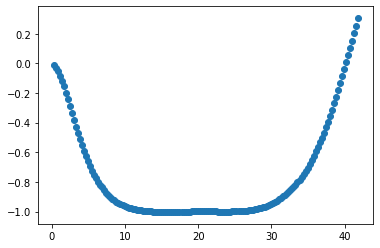

In [13]:
plt.scatter(path_ego_x, path_ego_y)

Text(0, 0.5, 'Y[m]')

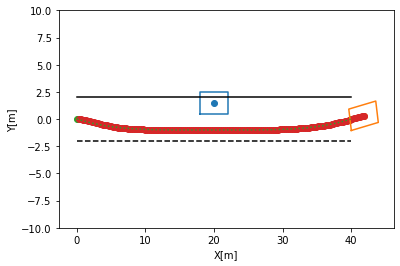

In [14]:
plt.scatter(parked_vehicle.pos[0], parked_vehicle.pos[1])
vehicle_plot(parked_vehicle.pos, parked_vehicle.size, parked_vehicle.ori)
plt.scatter(ego_vehicle.pos[0], ego_vehicle.pos[1])
vehicle_plot(ego_vehicle.pos, ego_vehicle.size, ego_vehicle.ori)

plt.plot(line_left[0], line_left[1], 'k')
plt.plot(line_right[0], line_right[1], '--k')

plt.scatter(points[0],points[1])
plt.plot(path_x, path_y,':')

plt.scatter(path_ego_x, path_ego_y)

plt.ylim([-10,10])
plt.xlabel('X[m]')
plt.ylabel('Y[m]')

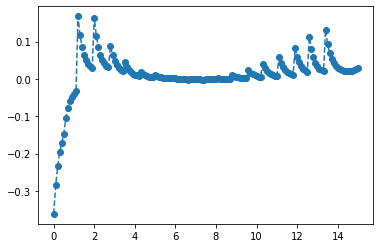

In [15]:
plt.plot(time, yawrate,'o--')

In [16]:
import matplotlib.animation as animation

In [17]:
ani = animation.ArtistAnimation(fig, [ims])
fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [18]:
ani.save('anim.gif', writer="imagemagick")

In [19]:
ani.save("sample.gif", writer='pillow')

In [20]:
from matplotlib.animation import PillowWriter
# ani.save("sample1.gif", writer=PillowWriter())

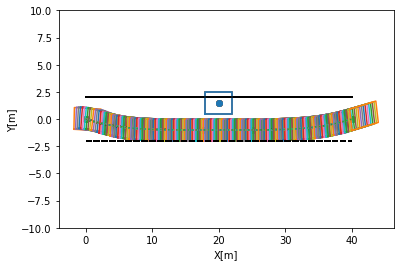

In [21]:
fig